Batool Hammouda 
1202874
Student Exam Performance Prediction

- Loading the dataset

Number of features: 3
Number of examples: 500
Missing Values:
 Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64
       Study Hours  Previous Exam Score   Pass/Fail
count   500.000000           500.000000  500.000000
mean      5.487055            68.917084    0.368000
std       2.688196            17.129607    0.482744
min       1.045554            40.277921    0.000000
25%       3.171517            53.745955    0.000000
50%       5.618474            68.309294    0.000000
75%       7.805124            83.580209    1.000000
max       9.936683            99.983060    1.000000


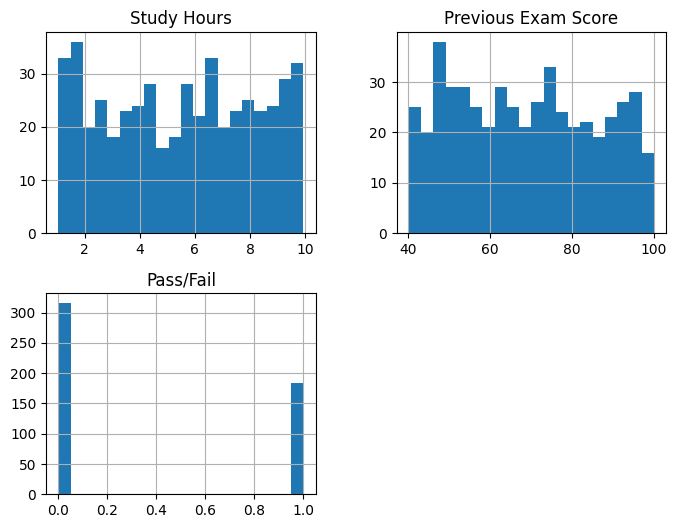

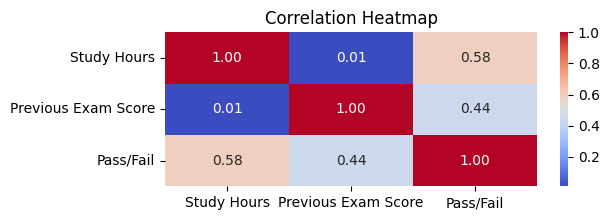

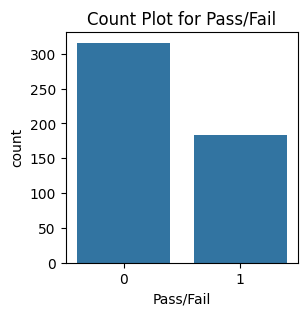

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('C:\\Users\\msi\Desktop\\MLproject\\student_exam_data.csv')
print(f"Number of features: {df.shape[1]}")
print(f"Number of examples: {df.shape[0]}")

missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


print(df.describe())

df.hist(bins=20, figsize=(8, 6))
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6, 2))  
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(3, 3))
sns.countplot(x='Pass/Fail', data=df)
plt.title("Count Plot for Pass/Fail")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df[['Study Hours', 'Previous Exam Score']]
y = df['Pass/Fail']

#split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#create the KNN models:
#for K=1:
knn1 = KNeighborsClassifier(n_neighbors=1)
#for K=3:
knn3 = KNeighborsClassifier(n_neighbors=3)

#Fitting the model of the training set
knn1.fit(X_train, y_train)
knn3.fit(X_train, y_train)

#prediction on the validation set
y_pred_val_knn1 = knn1.predict(X_val)
y_pred_val_knn3 = knn3.predict(X_val)

#calculate performance on the validation set
accuracy_val_knn1 = accuracy_score(y_val, y_pred_val_knn1)
accuracy_val_knn3 = accuracy_score(y_val, y_pred_val_knn3)

print("Validation Performance with k=1:")
print("Accuracy:", accuracy_val_knn1)
print("Classification Report:\n", classification_report(y_val, y_pred_val_knn1))

print("\nValidation Performance with k=3:")
print("Accuracy:", accuracy_val_knn3)
print("Classification Report:\n", classification_report(y_val, y_pred_val_knn3))

#prediction on test set
y_pred_test_knn1 = knn1.predict(X_test)
y_pred_test_knn3 = knn3.predict(X_test)

# claculate the performance on test set
accuracy_test_knn1 = accuracy_score(y_test, y_pred_test_knn1)
accuracy_test_knn3 = accuracy_score(y_test, y_pred_test_knn3)

# Report the test performance
print("\nTest Performance with k=1:")
print("Accuracy:", accuracy_test_knn1)
print("Classification Report:\n", classification_report(y_test, y_pred_test_knn1))

print("\nTest Performance with k=3:")
print("Accuracy:", accuracy_test_knn3)
print("Classification Report:\n", classification_report(y_test, y_pred_test_knn3))


Validation Performance with k=1:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        36

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Validation Performance with k=3:
Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        64
           1       1.00      0.97      0.99        36

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100


Test Performance with k=1:
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.94   

The proposed ML models

Logistic Regression:

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Define hyperparameters to tune
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV for hyperparameter tuning
grid_search_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameter
best_lr = grid_search_lr.best_estimator_

# Evaluate the performance on the validation set
y_pred_val_lr = best_lr.predict(X_val)
accuracy_val_lr = accuracy_score(y_val, y_pred_val_lr)

# Report the performance
print("Logistic Regression Performance on Validation Set:")
print("Best Hyperparameter:", best_lr.get_params()['C'])
print("Accuracy:", accuracy_val_lr)
print("Classification Report:\n", classification_report(y_val, y_pred_val_lr))


Logistic Regression Performance on Validation Set:
Best Hyperparameter: 0.01
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89        64
           1       0.84      0.75      0.79        36

    accuracy                           0.86       100
   macro avg       0.86      0.84      0.84       100
weighted avg       0.86      0.86      0.86       100



SVM:

In [9]:
from sklearn.svm import SVC

# Create Support Vector Machines (SVM) model
svm_model = SVC(kernel='linear', random_state=42)

# Define hyperparameters to tune
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV for hyperparameter tuning
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameter
best_svm = grid_search_svm.best_estimator_

# Evaluate the performance on the validation set
y_pred_val_svm = best_svm.predict(X_val)
accuracy_val_svm = accuracy_score(y_val, y_pred_val_svm)

# Report the performance
print("\nSupport Vector Machines (SVM) Performance on Validation Set:")
print("Best Hyperparameter:", best_svm.get_params()['C'])
print("Accuracy:", accuracy_val_svm)
print("Classification Report:\n", classification_report(y_val, y_pred_val_svm))



Support Vector Machines (SVM) Performance on Validation Set:
Best Hyperparameter: 0.01
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        64
           1       0.90      0.72      0.80        36

    accuracy                           0.87       100
   macro avg       0.88      0.84      0.85       100
weighted avg       0.87      0.87      0.87       100



-  Performance analysis:

In [10]:
from sklearn.metrics import mean_squared_error
best_model = best_svm  


y_pred_test = best_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
print("\nMean Squared Error on Test Set:", mse_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest Performance:")
print("Accuracy:", accuracy_test)
print("Classification Report:\n", classification_report(y_test, y_pred_test))

# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix:")
print(conf_matrix)

misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred_test)) if true != pred]


print("\nMisclassified Instances:")
for idx in misclassified_indices[:min(5, len(misclassified_indices))]:
    print(f"True Label: {y_test.iloc[idx]}, Predicted Label: {y_pred_test[idx]}, Features: {X_test.iloc[idx].values}")



Mean Squared Error on Test Set: 0.12

Test Performance:
Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        64
           1       0.83      0.83      0.83        36

    accuracy                           0.88       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.88      0.88      0.88       100


Confusion Matrix:
[[58  6]
 [ 6 30]]

Misclassified Instances:
True Label: 0, Predicted Label: 1, Features: [ 9.93668317 55.73584266]
True Label: 0, Predicted Label: 1, Features: [ 4.71355909 91.34178809]
True Label: 1, Predicted Label: 0, Features: [ 5.43362594 62.98831169]
True Label: 1, Predicted Label: 0, Features: [ 6.96270056 61.48976308]
True Label: 1, Predicted Label: 0, Features: [ 6.80925066 66.34809451]
